In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


import warnings
warnings.simplefilter("ignore")

C:\Users\Bhavya N\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Quarter 1
dataset_2016_Q1 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')


In [3]:
dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)


In [4]:
#dataset_2016_full=pd.concat([dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])
dataset_2016_full=pd.concat([dataset_2016_Q1])

In [5]:
data_2016 = pd.DataFrame(dataset_2016_full.groupby(dataset_2016_full['starttime'].dt.date).count()['trip_id'])
data_2016.columns = ['checkout']

In [6]:
data_2016.head()

,checkout
starttime,
2015-04-01,6203
2015-04-02,4313
2015-04-03,4034
2015-04-04,4860
2015-04-05,5194


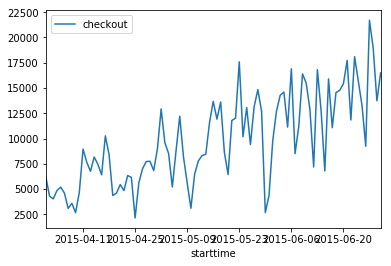

In [7]:
data_2016.plot()
plt.show()

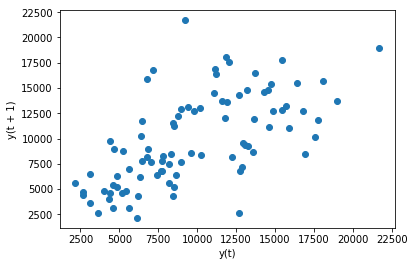

In [8]:
lag_plot(data_2016)
plt.show()

In [9]:

# correlation 
values = pd.DataFrame(data_2016.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.626736
t+1  0.626736  1.000000


# autocorrelation_plot

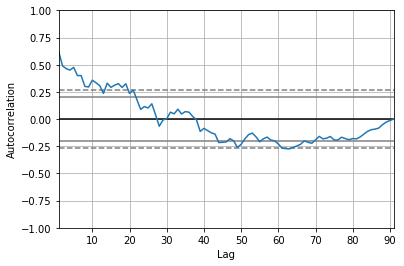

In [10]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_2016)
plt.show()

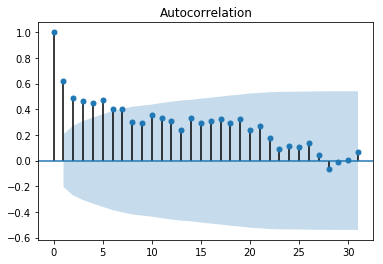

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_2016, lags=31)
plt.show()

## For Q1 all years , station =91

## ARMA model  (data =only Q2 of 2015 stn =35 , prediction= march of 2016 )

In [12]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm

In [13]:
dataset_2016_Q1.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5943500,2015-06-30 23:59:00,2015-07-01 00:10:00,1712,626,332,Halsted St & Diversey Pkwy,327,Sheffield Ave & Webster Ave,Subscriber,Male,1993.0
1,5943499,2015-06-30 23:59:00,2015-07-01 00:23:00,4209,1428,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,Customer,NaN,NaN
2,5943498,2015-06-30 23:59:00,2015-07-01 00:06:00,4102,443,332,Halsted St & Diversey Pkwy,327,Sheffield Ave & Webster Ave,Subscriber,Female,1995.0
3,5943497,2015-06-30 23:58:00,2015-07-01 00:19:00,2591,1224,112,Green St & Randolph St,222,Milwaukee Ave & Rockwell St,Subscriber,Male,1977.0
4,5943495,2015-06-30 23:57:00,2015-07-01 00:24:00,1188,1604,144,Larrabee St & Webster Ave,350,Ashland Ave & Chicago Ave,Customer,NaN,NaN


In [14]:
df_particular_Stn_16 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==35)]
filtereddata_2016_Q2 = dataset_2016_Q1[(dataset_2016_Q1.starttime.dt.weekday_name!='Saturday') & (dataset_2016_Q1.starttime.dt.weekday_name!='Sunday')]

data_2016_ = pd.DataFrame(filtereddata_2016_Q2.groupby(filtereddata_2016_Q2['starttime'].dt.date).count()['trip_id'])





In [42]:
data_2016_.tail(15)

,trip_id
starttime,
2015-06-16,15902
2015-06-17,11069
2015-06-18,14546
2015-06-19,14771
2015-06-20,15422
2015-06-21,17731
2015-06-22,11838
2015-06-23,18106
2015-06-24,15685


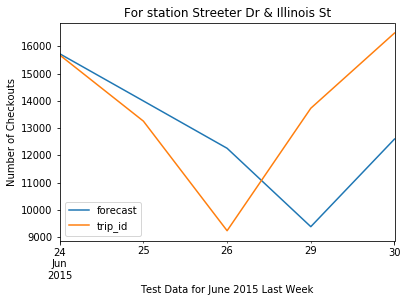

In [16]:

from statsmodels.tsa.arima_model import ARMA
md_1_AR=ARMA(data_2016_,(1,0)).fit()

md_1_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


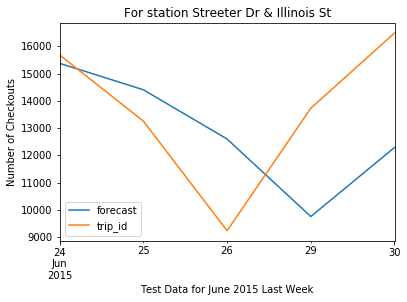

In [17]:

md_2_AR=ARMA(data_2016_,(2,0)).fit()

md_2_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


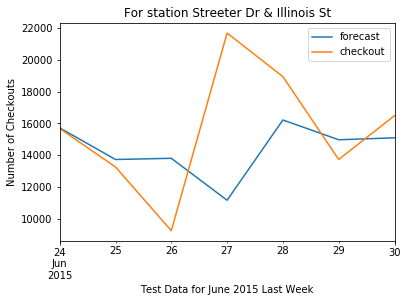

In [18]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
data_2016_.columns = ['checkout']
md_3_AR=ARMA(data_2016_,(3,0)).fit()

md_3_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [19]:
#md.summary()

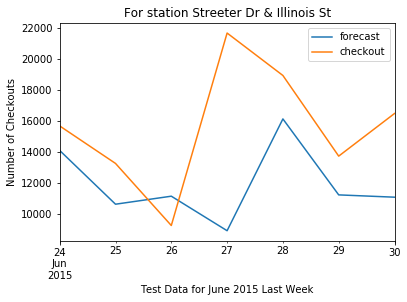

In [20]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_1_MA=ARMA(data_2016_,(0,1)).fit()

md_1_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


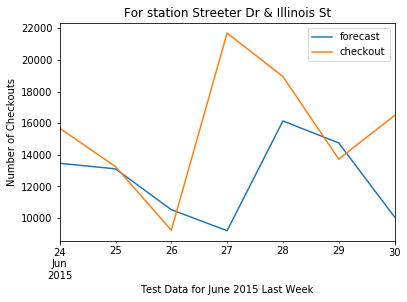

In [21]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_2_MA=ARMA(data_2016_,(0,2)).fit()

md_2_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


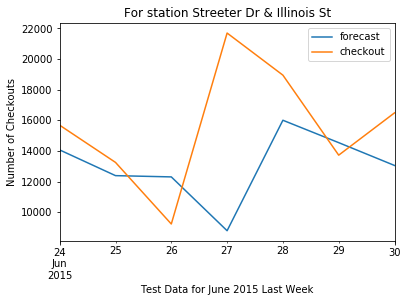

In [22]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_3_MA=ARMA(data_2016_,(0,3)).fit()

md_3_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [23]:
md_1_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                trip_id   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                -607.457
Method:                       css-mle   S.D. of innovations           2754.604
Date:                Mon, 02 Dec 2019   AIC                           1220.913
Time:                        13:42:36   BIC                           1227.436
Sample:                    04-01-2015   HQIC                          1223.487
                         - 06-30-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9757.5261   1157.993      8.426      0.000    7487.902     1.2e+04
ar.L1.trip_id     0.7155      0.088      8.090      0.000       0.542       0.889
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3977           +0.0000j            1.3977            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
bic=[]
md_2_AR.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                trip_id   No. Observations:                   65
Model:                     ARMA(2, 0)   Log Likelihood                -607.170
Method:                       css-mle   S.D. of innovations           2741.923
Date:                Mon, 02 Dec 2019   AIC                           1222.339
Time:                        13:42:36   BIC                           1231.037
Sample:                    04-01-2015   HQIC                          1225.771
                         - 06-30-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9766.6337   1272.776      7.673      0.000    7272.038    1.23e+04
ar.L1.trip_id     0.6492      0.124      5.241      0.000       0.406       0.892
ar.L2.trip_id     0.0960      0.126      0.759      0.450      -0.152       0.344
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2932           +0.0000j            1.2932            0.0000
AR.2           -8.0570           +0.0000j            8.0570            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
md_3_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   91
Model:                     ARMA(3, 0)   Log Likelihood                -867.319
Method:                       css-mle   S.D. of innovations           3320.277
Date:                Mon, 02 Dec 2019   AIC                           1744.638
Time:                        13:42:36   BIC                           1757.192
Sample:                    04-01-2015   HQIC                          1749.703
                         - 06-30-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9933.5739   1478.014      6.721      0.000    7036.719    1.28e+04
ar.L1.checkout     0.4749      0.102      4.670      0.000       0.276       0.674
ar.L2.checkout     0.0776      0.114      0.682      0.497      -0.145       0.300
ar.L3.checkout     0.2258      0.104      2.162      0.033       0.021       0.430
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1550           -0.0000j            1.1550           -0.0000
AR.2           -0.7492           -1.8091j            1.9581           -0.3125
AR.3           -0.7492           +1.8091j            1.9581            0.3125
-----------------------------------------------------------------------------
"""

In [26]:
md_1_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   91
Model:                     ARMA(0, 1)   Log Likelihood                -879.014
Method:                       css-mle   S.D. of innovations           3785.849
Date:                Mon, 02 Dec 2019   AIC                           1764.027
Time:                        13:42:36   BIC                           1771.560
Sample:                    04-01-2015   HQIC                          1767.066
                         - 06-30-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9834.2097    590.207     16.662      0.000    8677.425     1.1e+04
ma.L1.checkout     0.4926      0.081      6.105      0.000       0.334       0.651
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0302           +0.0000j            2.0302            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
md_2_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   91
Model:                     ARMA(0, 2)   Log Likelihood                -875.319
Method:                       css-mle   S.D. of innovations           3633.859
Date:                Mon, 02 Dec 2019   AIC                           1758.638
Time:                        13:42:36   BIC                           1768.682
Sample:                    04-01-2015   HQIC                          1762.690
                         - 06-30-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9854.4895    682.884     14.431      0.000    8516.061    1.12e+04
ma.L1.checkout     0.5315      0.102      5.204      0.000       0.331       0.732
ma.L2.checkout     0.2726      0.095      2.859      0.005       0.086       0.459
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9748           -1.6486j            1.9152           -0.3350
MA.2           -0.9748           +1.6486j            1.9152            0.3350
-----------------------------------------------------------------------------
"""

In [28]:
md_3_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   91
Model:                     ARMA(0, 3)   Log Likelihood                -873.202
Method:                       css-mle   S.D. of innovations           3549.157
Date:                Mon, 02 Dec 2019   AIC                           1756.404
Time:                        13:42:36   BIC                           1768.959
Sample:                    04-01-2015   HQIC                          1761.469
                         - 06-30-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9836.7007    753.847     13.049      0.000    8359.188    1.13e+04
ma.L1.checkout     0.5341      0.105      5.103      0.000       0.329       0.739
ma.L2.checkout     0.2947      0.103      2.869      0.005       0.093       0.496
ma.L3.checkout     0.2162      0.098      2.217      0.029       0.025       0.407
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6113           -0.0000j            1.6113           -0.5000
MA.2            0.1242           -1.6896j            1.6942           -0.2383
MA.3            0.1242           +1.6896j            1.6942            0.2383
-----------------------------------------------------------------------------
"""

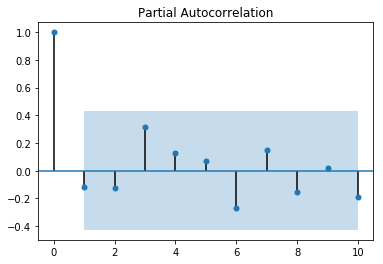

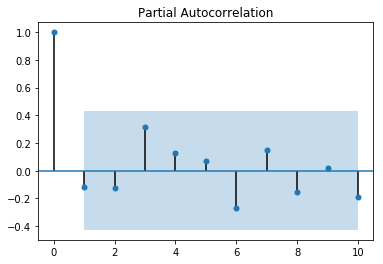

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

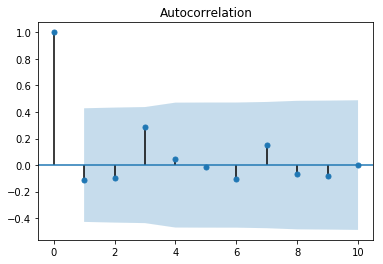

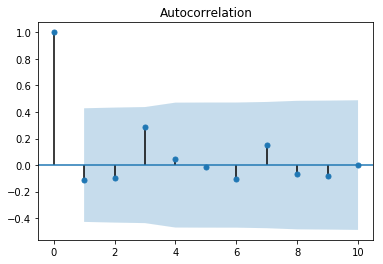

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

## ARMA 

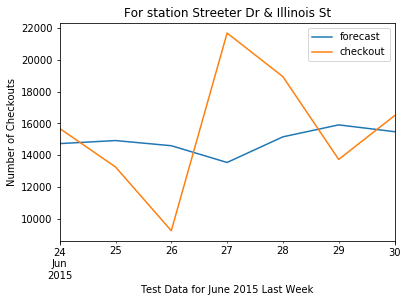

In [31]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_11=ARMA(data_2016_ ,(1,1)).fit()

md_ARMA_11.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [48]:
data_2016_.shape

(91, 1)

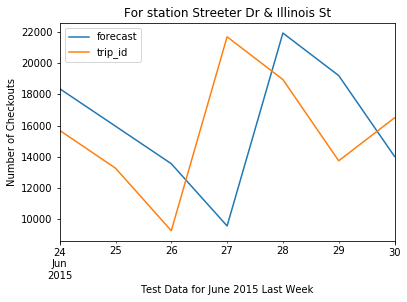

In [32]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_21=ARMA(data_2016_ ,(2,1)).fit()

md_ARMA_21.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()

In [33]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
"""
md_ARMA_22=ARMA(data_2016_ ,(2,2)).fit()

md_ARMA_22.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()"""

"\nmd_ARMA_22=ARMA(data_2016_ ,(2,2)).fit()\n\nmd_ARMA_22.plot_predict(start='2015-06-24', end='2015-06-30')\nplt.xlabel('Test Data for June 2015 Last Week')\nplt.ylabel('Number of Checkouts')\nplt.title('For station Streeter Dr & Illinois St')\nplt.show()"

In [34]:
data_2016_.shape

(91, 1)

In [35]:
aic = []
aic.append(md_1_AR.aic)
aic.append(md_2_AR.aic)
aic.append(md_3_AR.aic)
aic.append(md_1_MA.aic)
aic.append(md_2_MA.aic)
aic.append(md_3_MA.aic)
aic.append(md_ARMA_11.aic)
#aic.append(md_ARMA_12.aic)
aic.append(md_ARMA_21.aic)


In [36]:
bic=[]
bic.append(md_1_AR.bic)
bic.append(md_2_AR.bic)
bic.append(md_3_AR.bic)
bic.append(md_1_MA.bic)
bic.append(md_2_MA.bic)
bic.append(md_3_MA.bic)
bic.append(md_ARMA_11.bic)
#bic.append(md_ARMA_12.bic)
bic.append(md_ARMA_21.bic)



In [37]:
aic,bic

([1220.9130297817344,
  1222.3393936812327,
  1744.6378825103525,
  1764.0273151712145,
  1758.6381599992974,
  1756.404479521626,
  1742.7558382962152,
  1774.5935867293292],
 [1227.4361915914212,
  1231.0369427608152,
  1757.1921800429368,
  1771.559893690765,
  1768.6815980253648,
  1768.9587770542103,
  1752.7992763222826,
  1787.1478842619135])

[Text(0,0,'AR1'),
 Text(0,0,'AR2'),
 Text(0,0,'AR3'),
 Text(0,0,'MA1'),
 Text(0,0,'MA2'),
 Text(0,0,'MA3'),
 Text(0,0,'ARMA11'),
 Text(0,0,'ARMA21')]

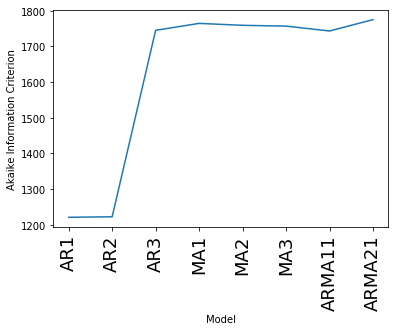

In [38]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
x = np.arange(8)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21']

fig, ax = plt.subplots(1,1) 
ax.plot(x,aic)
ax.set_xlabel("Model")
ax.set_ylabel("Akaike Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

[Text(0,0,'AR1'),
 Text(0,0,'AR2'),
 Text(0,0,'AR3'),
 Text(0,0,'MA1'),
 Text(0,0,'MA2'),
 Text(0,0,'MA3'),
 Text(0,0,'ARMA11'),
 Text(0,0,'ARMA21')]

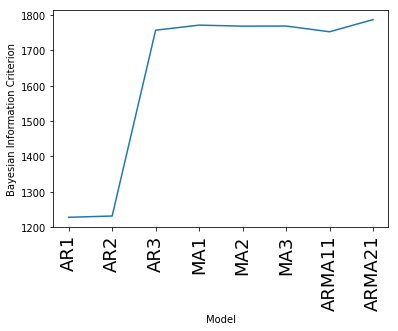

In [39]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
x = np.arange(8)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21']

fig, ax = plt.subplots(1,1) 
ax.plot(x,bic)
ax.set_xlabel("Model")
ax.set_ylabel("Bayesian Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)


In [44]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def modelARIMA(train,test,p,q,d):
    model = ARIMA(train, order=(p,q,d))  
    
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=0.3)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series
"""
def auto_arima(df):
    smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True) 



    print(smodel.summary())
    return smodel"""

"\ndef auto_arima(df):\n    smodel = pm.auto_arima(df, start_p=1, start_q=1,\n                         test='adf',\n                         max_p=3, max_q=3, m=12,\n                         start_P=0, seasonal=False,\n                         d=None, D=1, trace=True,\n                         error_action='ignore',  \n                         suppress_warnings=True, \n                         stepwise=True) \n\n\n\n    print(smodel.summary())\n    return smodel"

In [47]:
data_2016_.tail(5)

,trip_id
starttime,
2015-06-26,9237
2015-06-27,21703
2015-06-28,18954
2015-06-29,13731
2015-06-30,16491


                             ARIMA Model Results                              
Dep. Variable:              D.trip_id   No. Observations:                   85
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -797.201
Method:                       css-mle   S.D. of innovations           2793.793
Date:                Mon, 02 Dec 2019   AIC                           1604.402
Time:                        14:28:42   BIC                           1616.615
Sample:                    04-02-2015   HQIC                          1609.314
                         - 06-25-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             123.1647     14.141      8.710      0.000      95.449     150.881
ar.L1.D.trip_id     0.2278      0.109      2.099      0.039       0.015       0.440
ar.L2.D.trip_id    -0.0844      

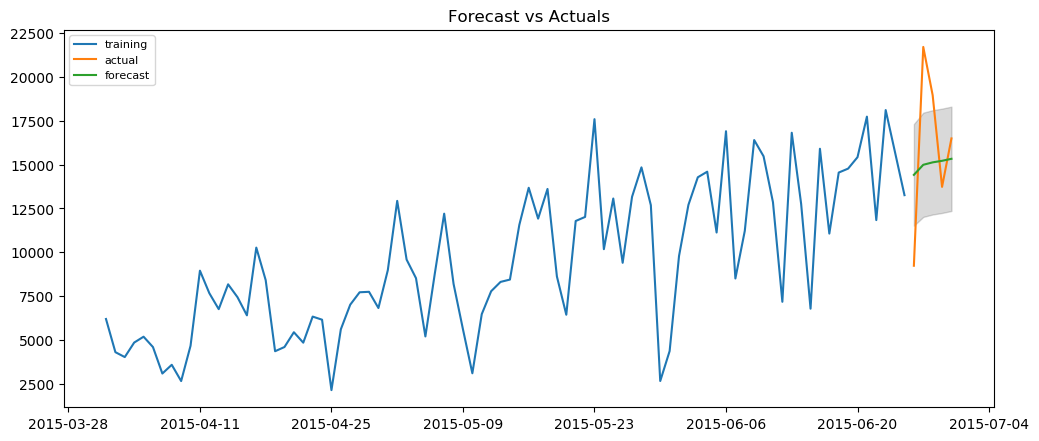

R square: 0.02472430889597843
MEan Absolute error: 3673.0231261022336


In [49]:
# Create Training and Test
train = data_2016_[:86]
test = data_2016_[86:]
fc,fc_series = modelARIMA(train,test,2,1,1)
#auto_arima(data_2016_)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

In [ ]:
data_2016_.head()